In [ ]:
!apt install enchant
!pip install PyEnchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
enchant is already the newest version (1.6.0-11.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import nltk
nltk.download('punkt')
import numpy as np
import string
from nltk.util import ngrams
import re
import pickle
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
import math
import enchant

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/My Drive/IIIT HYDERABAD/SEMESTER 6/NLP/Project/Dataset/CodeMix_train.txt"
# train_path = "/content/sample_data/train_CM.txt"
train_file = open(train_path, "r")
count=0
train_data=""
tokens=[]
five_grams=[]


for lines in train_file:
  ss = lines.isspace()
  if (not ss):
    lines = lines.replace("<unk>","") 
    # Remove punctuations
    new_line = re.sub("[^a-zA-Z0-9 ]", "", lines).lower().strip()
    # Removing punctuations, converting to lower case
    # new_line = "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
    train_data += new_line + "\n"
    for i in range(0,len(new_line.split())):
        temp1 = new_line.split()[i]
        tokens.append(temp1)
        if (i < len(new_line.split())-4): 
          temp4 = [new_line.split()[i+j] for j in range(0,5)]
          five_grams.append(temp4)
    count+=1
    if (count>10000): break


train_file.close()

In [ ]:
print(len(train_data.split('\n')))

10002


In [ ]:
tokens.append("UNK")
print(len(set(tokens)))

21196


In [ ]:
# create integer-to-token mapping
int2token = {}

count = 0
for w in set(tokens):
  int2token[count] = w
  count+= 1

# create token-to-integer mapping
token2int = {t: i for i, t in int2token.items()}

print(len(token2int),len(int2token))

21196 21196


In [ ]:
print(token2int)
print(int2token)

{'wajh': 0, 'aup': 1, 'two': 2, 'kajeriwal': 3, 'tomar': 4, 'hr': 5, 'author': 6, 'shaheb': 7, 'gandi': 8, 'maana': 9, 'banh': 10, 'khde': 11, 'milna': 12, 'ekbar': 13, 'hidu': 14, 'anekta': 15, 'terrarist': 16, 'bhalla': 17, 'malle': 18, 'jain': 19, 'techrs': 20, 'bank': 21, 'non': 22, 'badho': 23, 'chaand': 24, 'jong': 25, 'tukday': 26, 'bhuchal': 27, 'hamra': 28, 'bithaya': 29, 'bhatha': 30, 'chhodti': 31, 'bhadave': 32, 'dati': 33, 'touching': 34, 'sambhalna': 35, 'samajhtey': 36, 'bnaye': 37, 'bethkar': 38, 'atay': 39, 'stat': 40, 'mahrashtra': 41, 'khaternak': 42, 'humor': 43, 'ham': 44, 'spny': 45, 'mardon': 46, 'karty': 47, 'huk': 48, 'celebrity': 49, 'jaagir': 50, 'shinha': 51, 'sandesh': 52, 'ncrb': 53, 'rehy': 54, 'pighal': 55, 'fece': 56, 'whatsp': 57, 'itc': 58, 'moka': 59, 'gungan': 60, 'wear': 61, 'indoor': 62, 'on': 63, 'gadar': 64, 'aide': 65, 'victim': 66, 'baadal': 67, 'sreesanth': 68, 'aiims': 69, 'rs100': 70, 'settings': 71, 'chaha': 72, 'khalass': 73, 'asking': 74

In [ ]:
import pickle as pkl

with open('/content/int2tok.pkl', 'wb') as f:
    pkl.dump(int2token, f)
    f.close()
    
with open('/content/tok2int.pkl', 'wb') as f:
    pkl.dump(token2int, f)
    f.close()

In [ ]:
vocab_size = len(set(tokens))
print(vocab_size)

21196


In [ ]:
import collections

word_counter = collections.Counter()
for term in tokens:
    word_counter.update({term: 1})

ind=0
for i in word_counter:
  if (word_counter[i]==1): 
    ind+=1

print(ind)

11764


In [ ]:
common_words = word_counter.most_common(vocab_size-10000) # Most common terms
print(word_counter.most_common(100)) 

[('hai', 5277), ('to', 3390), ('ko', 3073), ('ki', 2994), ('me', 2442), ('ka', 2405), ('h', 2359), ('ke', 2249), ('se', 2014), ('ho', 1772), ('nahi', 1625), ('bhi', 1497), ('k', 1486), ('ye', 1442), ('hi', 1431), ('or', 1198), ('aur', 1159), ('kya', 1132), ('he', 1073), ('is', 1048), ('nhi', 1016), ('aap', 954), ('kar', 941), ('koi', 889), ('jo', 774), ('ji', 746), ('ne', 729), ('news', 714), ('liye', 706), ('india', 689), ('ek', 687), ('na', 661), ('modi', 632), ('log', 616), ('tak', 610), ('the', 608), ('aaj', 564), ('kuch', 564), ('par', 557), ('media', 556), ('in', 544), ('tha', 520), ('sab', 519), ('ab', 518), ('do', 505), ('bhai', 495), ('bjp', 493), ('ha', 491), ('desh', 485), ('hain', 475), ('party', 473), ('wo', 454), ('ya', 451), ('chahiye', 450), ('and', 448), ('of', 444), ('kr', 440), ('i', 432), ('raha', 425), ('kiya', 411), ('u', 401), ('hota', 396), ('a', 392), ('rahe', 391), ('tum', 380), ('baat', 374), ('m', 372), ('mai', 371), ('sir', 369), ('wale', 354), ('hoga', 353

In [ ]:
# seq = []
# seq = five_grams + bigrams + trigrams + four_grams
# len(seq),len(bigrams),len(trigrams),len(four_grams),len(five_grams)

In [ ]:
# create inputs and targets (x and y)
x = []
y = []

for s in five_grams:
    x.append(s[:-1])
    y.append(s[1:])

print(x[:10])
print(y[:10])

[['ye', 'to', 'hona', 'hi'], ['to', 'hona', 'hi', 'tha'], ['hona', 'hi', 'tha', 'kabhi'], ['hi', 'tha', 'kabhi', 'kisi'], ['tha', 'kabhi', 'kisi', 'neta'], ['kabhi', 'kisi', 'neta', 'ko'], ['kisi', 'neta', 'ko', 'saja'], ['neta', 'ko', 'saja', 'mili'], ['ko', 'saja', 'mili', 'hi'], ['saja', 'mili', 'hi', 'always']]
[['to', 'hona', 'hi', 'tha'], ['hona', 'hi', 'tha', 'kabhi'], ['hi', 'tha', 'kabhi', 'kisi'], ['tha', 'kabhi', 'kisi', 'neta'], ['kabhi', 'kisi', 'neta', 'ko'], ['kisi', 'neta', 'ko', 'saja'], ['neta', 'ko', 'saja', 'mili'], ['ko', 'saja', 'mili', 'hi'], ['saja', 'mili', 'hi', 'always'], ['mili', 'hi', 'always', 'clean']]


In [ ]:
def get_integer_seq(seq):
  temp=[]
  for w in seq:
    if w in common_words:
      temp.append(token2int[w])
    else:
      temp.append(token2int['UNK'])
  return temp

def get_integer_seq_unk(seq):
  temp=[]
  for w in seq:
    if w in common_words:
      temp.append(token2int[w])
    else:
      if w in token2int: temp.append(token2int[w])
      else: temp.append(token2int['UNK'])
  return temp

def get_lang_seq(seq):
    temp = []
    d = enchant.Dict("en_IN")
    for w in seq:
        if d.check(w): temp.append(1) #1 for English
        else: temp.append(0) #0 for Hindi
    return temp
    
# def get_integer_seq(seq):
#     ret = []
#     for w in seq:
#         if w in token2int:
#             ret.append(token2int[w])
#         else:
#             ret.append(token2int['UNK'])
    
#     return ret


In [ ]:
# convert text sequences to integer sequences
x_int_ = [get_integer_seq(i) for i in x]
x_int_unk = [get_integer_seq_unk(i) for i in x]
y_int_ = [get_integer_seq(i) for i in y]
y_int_unk = [get_integer_seq_unk(i) for i in y]

# convert lists to numpy arrays
x_int = np.array(x_int_+x_int_unk)
y_int = np.array(y_int_+y_int_unk)

In [ ]:
x_lang = [get_lang_seq(i) for i in x]
y_lang = [get_lang_seq(i) for i in y]

# convert lists to numpy arrays
x_lang = np.array(x_lang)
y_lang = np.array(y_lang)

In [ ]:
print(token2int['UNK'])

9468


In [ ]:
x_lang_x = np.array(list(x_lang)+list(x_lang))
y_lang_y = np.array(list(y_lang)+list(y_lang))

In [ ]:
def get_batches(arr_x, arr_y, lang_x, lang_y, batch_size): 
    # iterate through the arrays
    prv = 0
    for n in range(batch_size, arr_x.shape[0], batch_size):
      x = arr_x[prv:n,:]
      y = arr_y[prv:n,:]
      l_x = lang_x[prv:n,:]
      l_y = lang_y[prv:n,:]
      prv = n
      yield x, y, l_x, l_y

In [ ]:
class WordLSTM(nn.Module):
    def __init__(self, n_hidden=256, n_layers=4, drop_prob=0.3, lr=0.001):
        super().__init__()

        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr
        
        self.emb_layer = nn.Embedding(vocab_size, 200)

        ## define the LSTM
        self.lstm1 = nn.LSTM(200, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        self.lstm2 = nn.LSTM(200, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        ## define a dropout layer
        self.dropout1 = nn.Dropout(drop_prob)
        self.dropout2 = nn.Dropout(drop_prob)
        
        ## define the fully-connected layer
        self.fc = nn.Linear(n_hidden, vocab_size)      
    
    def forward(self, x, l_x, hidden1, hidden2):
        ''' Forward pass through the network. 
            These inputs are x, and the hidden/cell state `hidden`. '''

        ## pass input through embedding layer
        embedded1 = self.emb_layer(x)     
        embedded2 = self.emb_layer(l_x)     

        ## Get the outputs and the new hidden state from the lstm
        lstm_output1, hidden1 = self.lstm1(embedded1, hidden1)
        lstm_output2, hidden2 = self.lstm2(embedded2, hidden2)
        
        ## pass through a dropout layer
        out1 = self.dropout1(lstm_output1)
        out2 = self.dropout2(lstm_output2)
        
        #out = out.contiguous().view(-1, self.n_hidden) 
        out1 = out1.reshape(-1, self.n_hidden)
        out2 = out2.reshape(-1, self.n_hidden) 

        out = torch.cat((out1, out2), 0)
        ## put "out" through the fully-connected layer
        out = self.fc(out)

        # return the final output and the hidden state
        return out, hidden1, hidden2
    
    
    def init_hidden(self, batch_size):
        ''' initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        # if GPU is available
        if (torch.cuda.is_available()):
          hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
                    weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
        
        # if GPU is not available
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                    weight.new(self.n_layers, batch_size, self.n_hidden).zero_())
        
        return hidden

In [ ]:
# instantiate the model
net = WordLSTM()

# push the model to GPU (avoid it if you are not using the GPU)
net.cuda()

print(net)

WordLSTM(
  (emb_layer): Embedding(21196, 200)
  (lstm1): LSTM(200, 256, num_layers=4, batch_first=True, dropout=0.3)
  (lstm2): LSTM(200, 256, num_layers=4, batch_first=True, dropout=0.3)
  (dropout1): Dropout(p=0.3, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=21196, bias=True)
)


In [ ]:
def train(net, epochs=10, batch_size=32, lr=0.001, clip=1, print_every=32):
    
    # optimizer
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    
    # loss
    criterion = nn.CrossEntropyLoss()
    
    # push model to GPU
    net.cuda()
    
    counter = 0
    losses = []

    net.train()

    for e in range(epochs):

        # initialize hidden state
        h1 = net.init_hidden(batch_size)
        h2 = net.init_hidden(batch_size)

        for x, y, l_x, l_y in get_batches(x_int, y_int, x_lang_x, y_lang_y, batch_size):
            counter+= 1
            # convert numpy arrays to PyTorch arrays
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            lang_inputs, lang_targets = torch.from_numpy(l_x), torch.from_numpy(l_y)
            # push tensors to GPU
            inputs, targets = inputs.cuda(), targets.cuda()
            lang_inputs, lang_targets = lang_inputs.cuda(), lang_targets.cuda()

            # detach hidden states
            h1 = tuple([each.data for each in h1])
            h2 = tuple([each.data for each in h2])

            # zero accumulated gradients
            net.zero_grad()
            
            # get the output from the model
            output, h1, h2 = net(inputs, lang_inputs, h1, h2)
            
            # calculate the loss and perform backprop
            loss = criterion(output, torch.cat((targets.view(-1), lang_targets.view(-1))))

            # store loss of each epoch
            losses.append(loss)

            # back-propagate error
            loss.backward()

            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)

            # update weigths
            opt.step()            
            
            if counter % print_every == 0:
            
                print("Epoch: {}/{}...".format(e+1, epochs), 
                      "Step: {}...".format(counter))
                
    return losses

In [ ]:
print(len(x))

155157


In [ ]:
losses = train(net, batch_size = 32, epochs=15, print_every=256)

Epoch: 1/15... Step: 256...
Epoch: 1/15... Step: 512...
Epoch: 1/15... Step: 768...
Epoch: 1/15... Step: 1024...
Epoch: 1/15... Step: 1280...
Epoch: 1/15... Step: 1536...
Epoch: 1/15... Step: 1792...
Epoch: 1/15... Step: 2048...
Epoch: 1/15... Step: 2304...
Epoch: 1/15... Step: 2560...
Epoch: 1/15... Step: 2816...
Epoch: 1/15... Step: 3072...
Epoch: 1/15... Step: 3328...
Epoch: 1/15... Step: 3584...
Epoch: 1/15... Step: 3840...
Epoch: 1/15... Step: 4096...
Epoch: 1/15... Step: 4352...
Epoch: 1/15... Step: 4608...
Epoch: 1/15... Step: 4864...
Epoch: 1/15... Step: 5120...
Epoch: 1/15... Step: 5376...
Epoch: 1/15... Step: 5632...
Epoch: 1/15... Step: 5888...
Epoch: 1/15... Step: 6144...
Epoch: 1/15... Step: 6400...
Epoch: 1/15... Step: 6656...
Epoch: 1/15... Step: 6912...
Epoch: 1/15... Step: 7168...
Epoch: 1/15... Step: 7424...
Epoch: 1/15... Step: 7680...
Epoch: 1/15... Step: 7936...
Epoch: 1/15... Step: 8192...
Epoch: 1/15... Step: 8448...
Epoch: 1/15... Step: 8704...
Epoch: 1/15... St

In [ ]:
torch.save(net, '/content/model')

In [ ]:
print(losses[0].item())

9.941549301147461


In [ ]:
import pandas as pd
data = {
    'Epoch': [i for i in range(1,16)]
}

temp = []
for i in range(0,15):
  temp.append(losses[i].item())

data['Loss']= [i for i in temp]
df = pd.DataFrame(data,columns=['Epoch','Loss'])
print (df)

    Epoch      Loss
0       1  9.941549
1       2  9.873579
2       3  9.754515
3       4  9.546169
4       5  9.086511
5       6  8.110243
6       7  6.590604
7       8  5.305894
8       9  4.211862
9      10  3.422567
10     11  2.613928
11     12  1.952968
12     13  1.539642
13     14  1.295286
14     15  0.896017


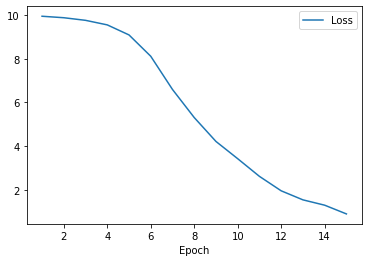

In [ ]:
df.plot(x ='Epoch', y='Loss', kind = 'line')

In [ ]:
# predict next token
def predict_prob(net, tkn, lng, trg, h1=None, h2=None):
            
    # tensor inputs
    if tkn in token2int:
      x = np.array([[token2int[tkn]]])
    else:
      x = np.array([[token2int['UNK']]])

    inputs1 = torch.from_numpy(x)
    inputs2 = torch.from_numpy(np.array([[lng]]))

    # push to GPU
    inputs1 = inputs1.cuda()
    inputs2 = inputs2.cuda()

    # detach hidden state from history
    h1 = tuple([each.data for each in h1])
    h2 = tuple([each.data for each in h2])

    # get the output of the model
    out, h1, h2 = net(inputs1, inputs2, h1, h2)

    # get the token probabilities
    p = F.softmax(out, dim=1).data

    p = p.cpu()

    p = p.numpy()
    p = p[0].reshape(p.shape[1],)

    if trg in token2int:
        prob = p[token2int[trg]]
    else:
        prob = p[token2int['UNK']]

    return prob, h1, h2


# function to calculate perplexity
def get_prob(net, x, y, l_x, l_y):

    # push to GPU
    net.cuda()

    net.eval()

    # batch size is 1
    h1 = net.init_hidden(1)
    h2 = net.init_hidden(1)

    N = len(x)
    tmp = 1

    for i, gram in enumerate(x):
        prob, h1, h2 = predict_prob(net, gram, l_x[i], y[i], h1, h2)
        if (i==0): 
          if (gram in word_counter): tmp*= word_counter[gram]/vocab_size
          else: tmp*= ind/vocab_size   
        else:
          tmp *= prob
        # print(gram,prob,tmp)

    return math.log(tmp)


def get_perp(prob,n):
  p = math.exp(prob*(1/n))
  return 1/p
  # return prob**(-1/n)


In [ ]:
print(word_counter['UNK'])

10000


In [ ]:
word_counter['UNK'] = 10000

In [ ]:
train_path = "/content/drive/My Drive/IIIT HYDERABAD/SEMESTER 6/NLP/Project/Dataset/CodeMix_train.txt"
# train_path = "/content/sample_data/train_CM.txt"
train_file = open(train_path, "r")
count=0
perp=0
avg_perp=0

for lines in train_file:   
  if (count>10000): break
  ss = lines.isspace()
  if (not ss):
    lines = lines.replace("<unk>","")
    new_line = re.sub("[^a-zA-Z0-9 ]", "", lines).lower().strip()
    # new_line = "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
    output=0
    # print(new_line)
    for i in range(0,len(new_line.split())):
      test_x=[]
      test_y=[]
      if (i < len(new_line.split())-4): 
          temp = [new_line.split()[i+j] for j in range(0,5)]
          temp_x = temp[:-1]
          temp_y = temp[1:]
          test_x = get_integer_seq(temp_x)
          test_y = get_integer_seq(temp_y)
          lang_x = get_lang_seq(temp_x)
          lang_y = get_lang_seq(temp_y)
          output += get_prob(net, test_x, test_y, lang_x, lang_y)
          # print("5 gram",output)
    if len(new_line.split())!=0:
      perp = get_perp(output,len(new_line.split()))
      # print("perp",perp)
    avg_perp+=perp
    count+=1

train_file.close()
avg_perp = avg_perp/count
print("avg perp",avg_perp)

avg perp 1.5112563914224086


In [ ]:
test_path = "/content/drive/My Drive/IIIT HYDERABAD/SEMESTER 6/NLP/Project/Dataset/test.txt"
# test_path = "/content/sample_data/test_CM.txt"
test_file = open(test_path, "r")
count=0
test_data=""
perp=0
avg_perp=0

for lines in test_file:
  if(count>10000): break
  ss = lines.isspace()
  if (not ss):
    lines = lines.replace("<unk>","")
    new_line = re.sub("[^a-zA-Z0-9 ]", "", lines).lower().strip()
    # new_line = "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
    output=0
    for i in range(0,len(new_line.split())):
      test_x=[]
      test_y=[]
      if (i < len(new_line.split())-4): 
          temp = [new_line.split()[i+j] for j in range(0,5)]
          temp_x = temp[:-1]
          temp_y = temp[1:]
          test_x = get_integer_seq(temp_x)
          test_y = get_integer_seq(temp_y)
          lang_x = get_lang_seq(temp_x)
          lang_y = get_lang_seq(temp_y)
          output += get_prob(net, test_x, test_y, lang_x, lang_y)
    perp = get_perp(output,len(new_line.split()))
    avg_perp+=perp
    count+=1

test_file.close()
avg_perp = avg_perp/count
print(avg_perp)

1.52046411998412


In [ ]:
# predict next token
def predict(net, tkn, lng, h1=None, h2=None):
         
  # tensor inputs
  if tkn in token2int:
      x = np.array([[token2int[tkn]]])
  else:
      x = np.array([[token2int['UNK']]])
  inputs1 = torch.from_numpy(x)
  inputs2 = torch.from_numpy(np.array([[lng]]))
  
  # push to GPU
  inputs1 = inputs1.cuda()
  inputs2 = inputs2.cuda()

  # detach hidden state from history
  h1 = tuple([each.data for each in h1])
  h2 = tuple([each.data for each in h2])

  # get the output of the model
  out, h1, h2 = net(inputs1, inputs2, h1, h2)

  # get the token probabilities
  p = F.softmax(out, dim=1).data

  p = p.cpu()

  p = p.numpy()
  p = p[0].reshape(p.shape[1],)

  # get indices of top 3 values
  top_n_idx = p.argsort()[-3:][::-1]

  sampled_token_index = token2int['UNK']
  while int2token[sampled_token_index]=='UNK':
    # randomly select one of the three indices
    sampled_token_index = top_n_idx[random.sample([0,1,2],1)[0]]

  # return the encoded value of the predicted char and the hidden state
  return int2token[sampled_token_index], h1, h2
  
# function to generate text
def sample(net, size, prime='it is'):
        
    # push to GPU
    net.cuda()
    
    net.eval()

    # batch size is 1
    h1 = net.init_hidden(1)
    h2 = net.init_hidden(1)

    toks = prime.split()
    lng = get_lang_seq(toks)

    # predict next token
    for i, t in enumerate(toks):
      token, h1, h2 = predict(net, t, lng[i], h1, h2)
    
    toks.append(token)
    lng.append(get_lang_seq([token])[0])

    # predict subsequent tokens
    for i in range(size-1):
        token, h1, h2 = predict(net, toks[-1], lng[-1], h1, h2)
        toks.append(token)
        lng.append(get_lang_seq([token])[0])

    return ' '.join(toks)

In [ ]:
for i in range(4):
  print(sample(net, 5, prime="india"))

india ko to koi jagah hi
india ko to bhi nahi to
india ki tarah nahi h ye
india ka bhi news channel me


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="doctor"))

doctor ka name to koi bada
doctor ka naam hai ye ye
doctor ka name bhi nahi hoga
doctor ko bhi koi kam ho


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="teacher"))

teacher ko koi bhi kam nahi
teacher ko koi bada badi kam
teacher ka naam nahi hai ye
teacher ko bhi bhi bhi hi


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="comment"))

comment kr rahe h ye to
comment karo aur aap log koi
comment kar rhe hai to ye
comment karo aur ye bhi to


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="modi"))

modi ko bhi bada jarurat h
modi ko koi problem nahi h
modi ji ka baat nhi h
modi ji ka baat nahi to


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="life"))

life ki baat nhi hai ye
life ki tarah nahi hoga to
life ka baat hai aur ye
life ka naam hai to koi


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="bjp"))

bjp ki tarah to koi kam
bjp ka naam hai to to
bjp ko to bhi hi nahi
bjp ko to to bhi bhi


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="clean"))

clean rha h aur ye hi
clean rha hu to to to
clean rha h aur ye to
clean rahe hai to to koi


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="respect"))

respect kar rahe ho aur bhi
respect to to bhi nahi hai
respect kar rahe h ye bhi
respect to ye log to koi


In [ ]:
with open('/content/tok2int.pkl', 'rb') as f:
    token2int = pkl.load(f)
    f.close()

with open('/content/int2tok.pkl', 'rb') as f:
    int2token = pkl.load(f)
    f.close()

net = torch.load('/content/model')
net.eval()

In [ ]:
print(sample(net, 5, prime="india"))